In [1]:
#Import packages and set matplotlib settings
import pandas as pd
import matplotlib.pyplot as plt      
import matplotlib.colors as colors
import matplotlib.ticker as ticker
import matplotlib
from matplotlib.patches import Patch

plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
font = {'size'   : 16}
matplotlib.rc('font', **font)

def box_plot(ax, data, edge_color, fill_color,**kwargs):
    bp = ax.boxplot(data, patch_artist=True,**kwargs)   
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)       
        
    return bp

#These scripts are offered as is and reproduce the figure plots

In [2]:
#Sets values shared between figures
from matplotlib import colormaps
viridis = colormaps["viridis"].resampled(5)
#Skip extremes of the palette for visibility
color_palette = viridis.colors[1:]

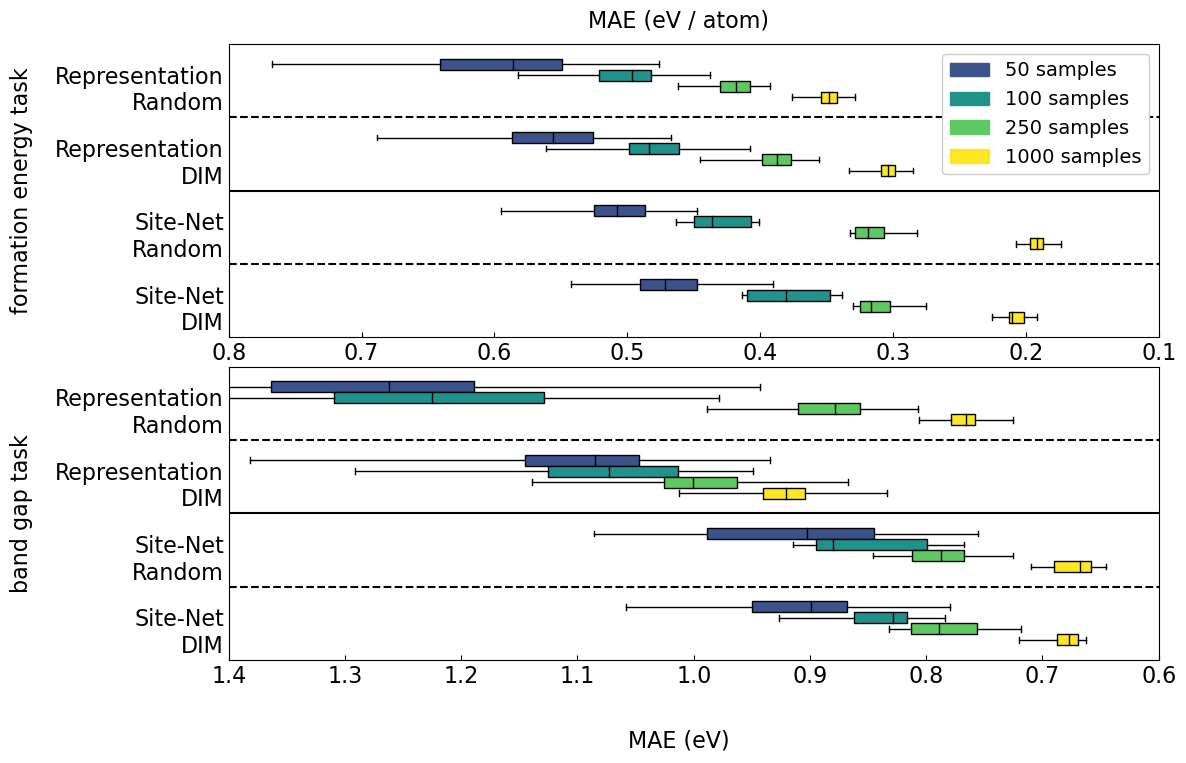

In [3]:
#Produces figure #

fig,ax = plt.subplots(2, 1, sharex=False, sharey="row",gridspec_kw={'wspace':0.2, 'hspace':0.1},figsize=(12,8))
fig.text(0.5, 0.0, "MAE (eV)", ha='center')
fig.text(0.5, 0.9, "MAE (eV / atom)", ha='center')

DownMAE = pd.read_csv("Downstream_MAEs.csv",header=None,names=["filename","MAE"])
RepMAE = pd.read_csv("Downstream_DIM.csv")
eformorbitalMAE = pd.read_csv("featurizer_pickles/eformorbital_Downstream_Featurized.csv")
eformjarvisMAE = pd.read_csv("featurizer_pickles copy/eformjarvis_Downstream_Featurized.csv")
eformxrayMAE =  pd.read_csv("featurizer_pickles/eformxray_Downstream_Featurized.csv")
Combined = pd.concat([DownMAE,RepMAE,eformorbitalMAE,eformjarvisMAE,eformxrayMAE])


box_plot_1 = ["eform_compact_dim_s50_initial_downstream_Neither_", "eform_compact_dim_s50_DIM_downstream_Neither_DIM_eform_"]
box_plot_2 = ["eform_compact_dim_s100_initial_downstream_Neither_", "eform_compact_dim_s100_DIM_downstream_Neither_DIM_eform_"]
box_plot_3 = ["eform_compact_dim_s250_initial_downstream_Neither_", "eform_compact_dim_s250_DIM_downstream_Neither_DIM_eform_"]
box_plot_4 = ["eform_compact_dim_s1000_initial_downstream_Neither_", "eform_compact_dim_s1000_DIM_downstream_Neither_DIM_eform_"]
box_plots = [box_plot_1, box_plot_2, box_plot_3, box_plot_4]

ax_i = 0
ax[0].set_ylabel("formation energy task",labelpad=16)
offset=-0.225
for plot, color, samples in zip(box_plots, color_palette, [50, 100, 250, 1000]):
    vectors = []
    vectors.append(RepMAE[(RepMAE["limit"] == samples) & (RepMAE["model"] == "Initial_eform")]["nn_MAE"])
    vectors.append(RepMAE[(RepMAE["limit"] == samples) & (RepMAE["model"] == "nocomp_klnorm_moremultiloss_eform")]["nn_MAE"])
    vectors.extend([DownMAE[DownMAE["filename"].str.contains(i)]["MAE"] for i in plot])

    if ax_i == 2:
        box_plot(ax[0], vectors, "black", color, labels=["Representation\nRandom", "Representation\nDIM", "Site-Net\nRandom", "Site-Net\nDIM"],vert=False,whis=100000000,positions=[1+offset, 2+offset, 3+offset, 4+offset], widths=0.15)
    else:
        box_plot(ax[0], vectors, "black", color, labels=["","","",""],vert=False,whis=100000000,positions=[1+offset, 2+offset, 3+offset, 4+offset], widths=0.15)
    ax[0].set_ylim(4.5,0.5)
    ax[0].set_xlim(0.8,0.1)
    ax_i += 1
    offset+=0.15

box_plot_1 = ["egap_compact_dim_s50_initial_downstream_Neither_", "egap_compact_dim_s50_DIM_downstream_Neither_DIM_egap_"]
box_plot_2 = ["egap_compact_dim_s100_initial_downstream_Neither_", "egap_compact_dim_s100_DIM_downstream_Neither_DIM_egap_"]
box_plot_3 = ["egap_compact_dim_s250_initial_downstream_Neither_", "egap_compact_dim_s250_DIM_downstream_Neither_DIM_egap_"]
box_plot_4 = ["egap_compact_dim_s1000_initial_downstream_Neither_", "egap_compact_dim_s1000_DIM_downstream_Neither_DIM_egap_"]
box_plots = [box_plot_1, box_plot_2, box_plot_3, box_plot_4]

ax_i = 0
ax[1].set_ylabel("band gap task",labelpad=16)
offset=-0.225
for plot, color, samples in zip(box_plots, color_palette, [50, 100, 250, 1000]):
    vectors = []
    vectors.append(RepMAE[(RepMAE["limit"] == samples) & (RepMAE["model"] == "Initial_egap")]["nn_MAE"])
    vectors.append(RepMAE[(RepMAE["limit"] == samples) & (RepMAE["model"] == "nocomp_klnorm_moremultiloss_egap")]["nn_MAE"])
    vectors.extend([DownMAE[DownMAE["filename"].str.contains(i)]["MAE"] for i in plot])
    if ax_i == 2:
        box_plot(ax[1], vectors, "black", color, labels=["Representation\nRandom", "Representation\nDIM", "Site-Net\nRandom", "Site-Net\nDIM"],vert=False,whis=100000000,positions=[1+offset, 2+offset, 3+offset, 4+offset], widths=0.15)
    else:
        box_plot(ax[1], vectors, "black", color, labels=["","","",""],vert=False,whis=100000000,positions=[1+offset, 2+offset, 3+offset, 4+offset], widths=0.15)
    ax[1].set_ylim(4.5,0.5)
    ax[1].set_xlim(1.4,0.6)
    ax_i += 1
    offset+=0.15

ax[0].legend(handles=[Patch(color=color_palette[0],label="50 samples"),Patch(color=color_palette[1],label="100 samples"),Patch(color=color_palette[2],label="250 samples"),Patch(color=color_palette[3],label="1000 samples")], loc='upper right', fontsize="14",framealpha=1)
[ax[0].axhline(y, color = 'black', linestyle='-') for y in [2.5]]
[ax[1].axhline(y, color = 'black', linestyle='-') for y in [2.5]]
[ax[0].axhline(y, color = 'black', linestyle='--') for y in [1.5, 3.5]]
[ax[1].axhline(y, color = 'black', linestyle='--') for y in [1.5, 3.5]]

ax[0].tick_params(axis="y", length=0)
ax[1].tick_params(axis="y", length=0)
fig.savefig("figure_reptranscomp.png",bbox_inches='tight')
fig.show()


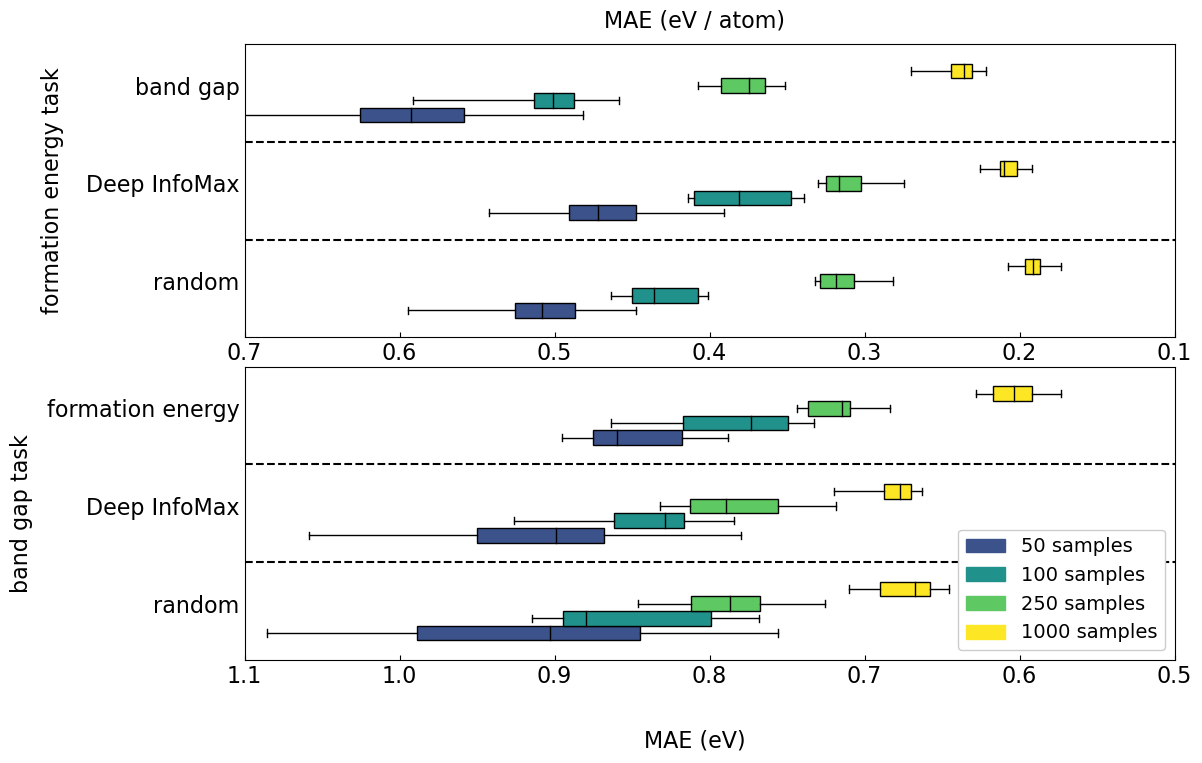

In [4]:
#Produces figure #

DownMAE = pd.read_csv("Downstream_MAEs.csv",header=None,names=["filename","MAE"])

box_plot_1 = [["eform_compact_dim_s50_initial_downstream_Neither_", "eform_compact_dim_s50_DIM_downstream_Neither_DIM_eform_", "eform_compact_dim_s50_DIM_downstream_Neither_Supervised_egap_"],["random","Deep InfoMax","band gap"],"eform_s100_transfer.png",[0.85,0.35]]
box_plot_2 = [["eform_compact_dim_s100_initial_downstream_Neither_","eform_compact_dim_s100_DIM_downstream_Neither_DIM_eform_","eform_compact_dim_s100_DIM_downstream_Neither_Supervised_egap_"],["random","Deep InfoMax","band gap"],"eform_s250_transfer.png",[0.65,0.3]]
box_plot_3 = [["eform_compact_dim_s250_initial_downstream_Neither_", "eform_compact_dim_s250_DIM_downstream_Neither_DIM_eform_", "eform_compact_dim_s250_DIM_downstream_Neither_Supervised_egap_"],["random","Deep InfoMax","band gap"],"eform_s1000_transfer.png",[0.45,0.25]]
box_plot_4 = [["eform_compact_dim_s1000_initial_downstream_Neither_", "eform_compact_dim_s1000_DIM_downstream_Neither_DIM_eform_", "eform_compact_dim_s1000_DIM_downstream_Neither_Supervised_egap_"],["random","Deep InfoMax","band gap"],"eform_s10000_transfer.png",[0.3,0.15]]
box_plot_queue = [box_plot_1,box_plot_2,box_plot_3,box_plot_4]

fig,ax = plt.subplots(2, 1, sharex=False, sharey="row",gridspec_kw={'wspace':0.2, 'hspace':0.1},figsize=(12,8))
fig.text(0.5, 0.0, "MAE (eV)", ha='center')
fig.text(0.5, 0.9, "MAE (eV / atom)", ha='center')

ax_i = 0
ax[0].set_ylabel("formation energy task",labelpad=16)
offset=-0.225
for plots, color, samples in zip(box_plot_queue, color_palette, [50, 100, 250, 1000]):
    vectors = [DownMAE[DownMAE["filename"].str.contains(i)]["MAE"] for i in plots[0]]
    if ax_i == 2:
        box_plot(ax[0],vectors,"black",color,labels=plots[1],vert=False,whis=100000000,positions=[1+offset,2+offset,3+offset],widths=0.15)
    else:
        box_plot(ax[0],vectors,"black",color,labels=["","",""],vert=False,whis=100000000,positions=[1+offset,2+offset,3+offset],widths=0.15)
    ax[0].set_ylim(0.5,3.5)
    ax[0].set_xlim(0.7,0.1)
    ax_i += 1
    offset+=0.15
    fig.show()

DownMAE = pd.read_csv("Downstream_MAEs.csv",header=None,names=["filename","MAE"])
box_plot_1 = [["egap_compact_dim_s50_initial_downstream_Neither_", "egap_compact_dim_s50_DIM_downstream_Neither_DIM_egap_", "egap_compact_dim_s50_DIM_downstream_Neither_Supervised_eform_"],["random","Deep InfoMax","formation energy"],"eform_s50_transfer.png",[1.15,0.7],50]
box_plot_2 = [["egap_compact_dim_s100_initial_downstream_Neither_","egap_compact_dim_s100_DIM_downstream_Neither_DIM_egap_","egap_compact_dim_s100_DIM_downstream_Neither_Supervised_eform_"],["random","Deep InfoMax","formation energy"],"eform_s100_transfer.png",[0.95,0.7],100]
box_plot_3 = [["egap_compact_dim_s250_initial_downstream_Neither_", "egap_compact_dim_s250_DIM_downstream_Neither_DIM_egap_", "egap_compact_dim_s250_DIM_downstream_Neither_Supervised_eform_"],["random","Deep InfoMax","formation energy"],"eform_s250_transfer.png",[0.9,0.65],250]
box_plot_4 = [["egap_compact_dim_s1000_initial_downstream_Neither_", "egap_compact_dim_s1000_DIM_downstream_Neither_DIM_egap_", "egap_compact_dim_s1000_DIM_downstream_Neither_Supervised_eform_"],["random","Deep InfoMax","formation energy"],"eform_s1000_transfer.png",[0.75,0.55],1000]
box_plot_queue = [box_plot_1,box_plot_2,box_plot_3,box_plot_4]

#fig,ax = plt.subplots(1, 4, sharex=False, sharey=True,gridspec_kw={'wspace':0.1, 'hspace':0},figsize=(12,6))
#fig.text(0.5, 0, "MAE (eV)", ha='center')

ax_i = 0
ax[1].set_ylabel("band gap task",labelpad=10)
offset=-0.225
for plots, color, samples in zip(box_plot_queue, color_palette, [50, 100, 250, 1000]):
    vectors = [DownMAE[DownMAE["filename"].str.contains(i)]["MAE"] for i in plots[0]]
    if ax_i == 2:
        box_plot(ax[1],vectors,"black",color,labels=plots[1],vert=False,whis=100000000,positions=[1+offset,2+offset,3+offset],widths=0.15)
    else:
        box_plot(ax[1],vectors,"black",color,labels=["","",""],vert=False,whis=100000000,positions=[1+offset,2+offset,3+offset],widths=0.15)
    ax[1].set_ylim(0.5,3.5)
    ax[1].set_xlim(1.1,0.5)
    ax_i += 1
    offset+=0.15
[ax[0].axhline(y, color = 'black', linestyle='--') for y in [1.5, 2.5]]
[ax[1].axhline(y, color = 'black', linestyle='--') for y in [1.5, 2.5]]
ax[1].legend(handles=[Patch(color=color_palette[0],label="50 samples"),Patch(color=color_palette[1],label="100 samples"),Patch(color=color_palette[2],label="250 samples"),Patch(color=color_palette[3],label="1000 samples")], loc='lower right', fontsize="14",framealpha=1)
    
ax[0].tick_params(axis="y", length=0)
ax[1].tick_params(axis="y", length=0)
fig.savefig("figure_transfer.png",bbox_inches="tight")
fig.show()


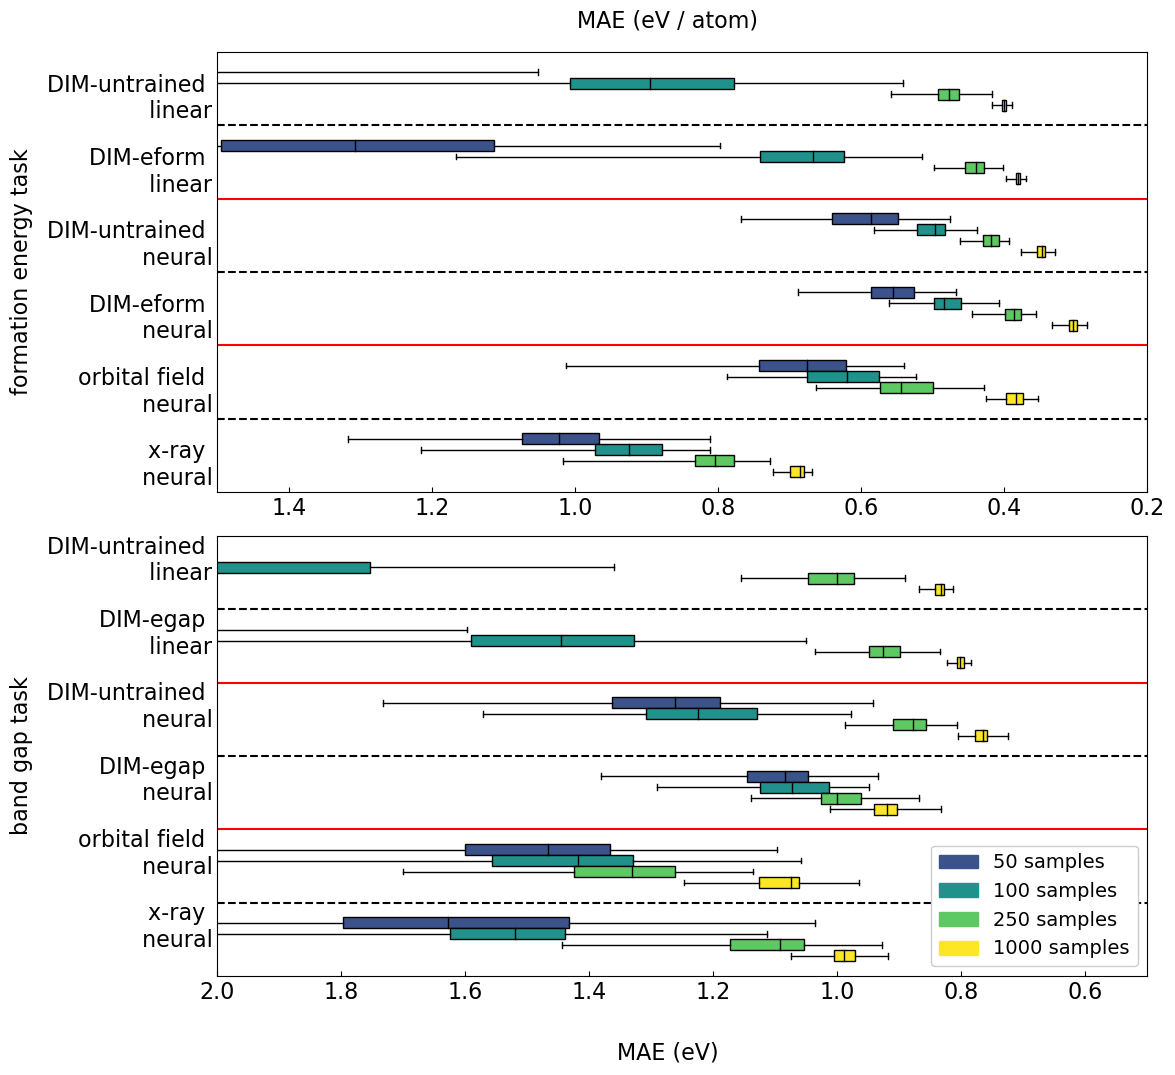

In [5]:
#Produces figure #

import pandas as pd
import matplotlib.pyplot as plt      
import matplotlib.colors as colors
import matplotlib.ticker as ticker
import matplotlib
import numpy as np

plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"

font = {'size'   : 16}

matplotlib.rc('font', **font)

RepMAE = pd.read_csv("Downstream_DIM.csv")
eformorbitalMAE = pd.read_csv("featurizer_pickles/eformorbital_Downstream_Featurized.csv")
eformjarvisMAE = pd.read_csv("featurizer_pickles copy/eformjarvis_Downstream_Featurized.csv")
eformxrayMAE =  pd.read_csv("featurizer_pickles/eformxray_Downstream_Featurized.csv")

fig,ax = plt.subplots(2, 1, sharex=False, sharey="row",gridspec_kw={'wspace':0.1, 'hspace':0.1},figsize=(12,12))
fig.text(0.5, 0.90, "MAE (eV / atom)", ha='center')

ax_i = 0
ax[0].set_ylabel("formation energy task",labelpad=10)
offset=-0.225
for limit,name,xlim,color in zip([50,100,250,1000],["eformorbital_replearn_10.png","eformorbital_replearn_50.png","eformorbital_replearn_100.png","eformorbital_replearn_250.png","eformorbital_replearn_1000.png","eformorbital_replearn_10000.png"],[[1.5,0.4],[1,0.4],[0.9,0.3],[0.8,0.28]],color_palette):

    vectors1 = RepMAE[(RepMAE["limit"] == limit) & (RepMAE["model"] == "Initial_eform")]
    vectors2 = RepMAE[(RepMAE["limit"] == limit) & (RepMAE["model"] == "nocomp_klnorm_moremultiloss_eform")]
    vectors3 = eformorbitalMAE[(eformorbitalMAE["limit"] == limit) & (eformorbitalMAE["model"] == "eform_orbital")]
    vectors4 = eformjarvisMAE[(eformjarvisMAE["limit"] == limit) & (eformjarvisMAE["model"] == "eform_jarvis")]
    vectors5 = eformxrayMAE[(eformxrayMAE["limit"] == limit) & (eformxrayMAE["model"] == "eform_xray")]

    if ax_i == 2:
        box_plot(ax[0],[vectors1["lin_MAE"],vectors2["lin_MAE"],vectors1["nn_MAE"],vectors2["nn_MAE"],vectors3["nn_MAE"],vectors5["nn_MAE"]],"black",color,labels=["DIM-untrained \n linear","DIM-eform \n linear","DIM-untrained \n neural","DIM-eform \n neural","orbital field \n neural","x-ray \n neural"],widths=0.15,vert=False,whis=100000000,positions=[i+1+offset for i in range(6)])
    else:
        box_plot(ax[0],[vectors1["lin_MAE"],vectors2["lin_MAE"],vectors1["nn_MAE"],vectors2["nn_MAE"],vectors3["nn_MAE"],vectors5["nn_MAE"]],"black",color,labels=["","","","","",""],widths=0.15,vert=False,whis=100000000,positions=[i+1+offset for i in range(6)])
    ax[0].set_ylim(6.5,0.5)
    ax[0].set_xlim(1.5,0.2)

    ax_i += 1
    offset+=0.15

RepMAE = pd.read_csv("Downstream_DIM.csv")
egaporbitalMAE = pd.read_csv("featurizer_pickles/egaporbital_Downstream_Featurized.csv")
egapjarvisMAE = pd.read_csv("featurizer_pickles copy/egapjarvis_Downstream_Featurized.csv")
egapxrayMAE =  pd.read_csv("featurizer_pickles/egapxray_Downstream_Featurized.csv")

fig.text(0.5, 0.04, "MAE (eV)", ha='center')

ax_i = 0
ax[1].set_ylabel("band gap task",labelpad=10)
offset=-0.225
for limit,name,xlim,color  in zip([50,100,250,1000],["egaporbital_replearn_10.png","egaporbital_replearn_50.png","egaporbital_replearn_100.png","egaporbital_replearn_250.png","egaporbital_replearn_1000.png","egaporbital_replearn_10000.png"],[[3.2,0.7],[2.5,0.8],[1.6,0.7],[1.3,0.7]],color_palette):

    vectors1 = RepMAE[(RepMAE["limit"] == limit) & (RepMAE["model"] == "Initial_egap")]
    vectors2 = RepMAE[(RepMAE["limit"] == limit) & (RepMAE["model"] == "nocomp_klnorm_moremultiloss_egap")]
    vectors3 = egaporbitalMAE[(eformorbitalMAE["limit"] == limit) & (egaporbitalMAE["model"] == "egap_orbital")]
    vectors4 = egapjarvisMAE[(eformjarvisMAE["limit"] == limit) & (egapjarvisMAE["model"] == "egap_jarvis")]
    vectors5 = egapxrayMAE[(eformxrayMAE["limit"] == limit) & (egapxrayMAE["model"] == "egap_xray")]

    xmin = np.min(np.array([np.min(vectors1["nn_MAE"]),np.min(vectors2["nn_MAE"]),np.min(vectors3["nn_MAE"]),np.min(vectors5["nn_MAE"])]))
    xmax = np.max(np.array([np.max(vectors1["nn_MAE"]),np.max(vectors2["nn_MAE"]),np.max(vectors3["nn_MAE"]),np.max(vectors5["nn_MAE"])]))
    xbuffer = (xmax-xmin)*0.05

    if ax_i == 0:
        box_plot(ax[1],[vectors1["lin_MAE"],vectors2["lin_MAE"],vectors1["nn_MAE"],vectors2["nn_MAE"],vectors3["nn_MAE"],vectors5["nn_MAE"]],"black",color,labels=["DIM-untrained \n linear","DIM-egap \n linear","DIM-untrained \n neural","DIM-egap \n neural","orbital field \n neural","x-ray \n neural"],vert=False,whis=100000000,positions=[i+1+offset for i in range(6)],widths=0.15)
    else:
        box_plot(ax[1],[vectors1["lin_MAE"],vectors2["lin_MAE"],vectors1["nn_MAE"],vectors2["nn_MAE"],vectors3["nn_MAE"],vectors5["nn_MAE"]],"black",color,labels=["","","","","",""],vert=False,whis=100000000,positions=[i+1+offset for i in range(6)],widths=0.15)
    ax[1].set_ylim(6.5,0.5)
    ax[1].set_xlim(2,0.5)

    ax_i += 1
    offset+=0.15

[ax[0].axhline(y, color = 'r', linestyle='-') for y in [2.5,4.5]]
[ax[0].axhline(y, color = 'black', linestyle='--') for y in [1.5,3.5,5.5]]
[ax[1].axhline(y, color = 'r', linestyle='-') for y in [2.5,4.5]]
[ax[1].axhline(y, color = 'black', linestyle='--') for y in [1.5,3.5,5.5]]
ax[1].legend(handles=[Patch(color=color_palette[0],label="50 samples"),Patch(color=color_palette[1],label="100 samples"),Patch(color=color_palette[2],label="250 samples"),Patch(color=color_palette[3],label="1000 samples")], loc='lower right', fontsize="14",framealpha=1)

ax[0].tick_params(axis="y", length=0)
ax[1].tick_params(axis="y", length=0)
fig.savefig("figure_representation.png",bbox_inches="tight")
fig.show()



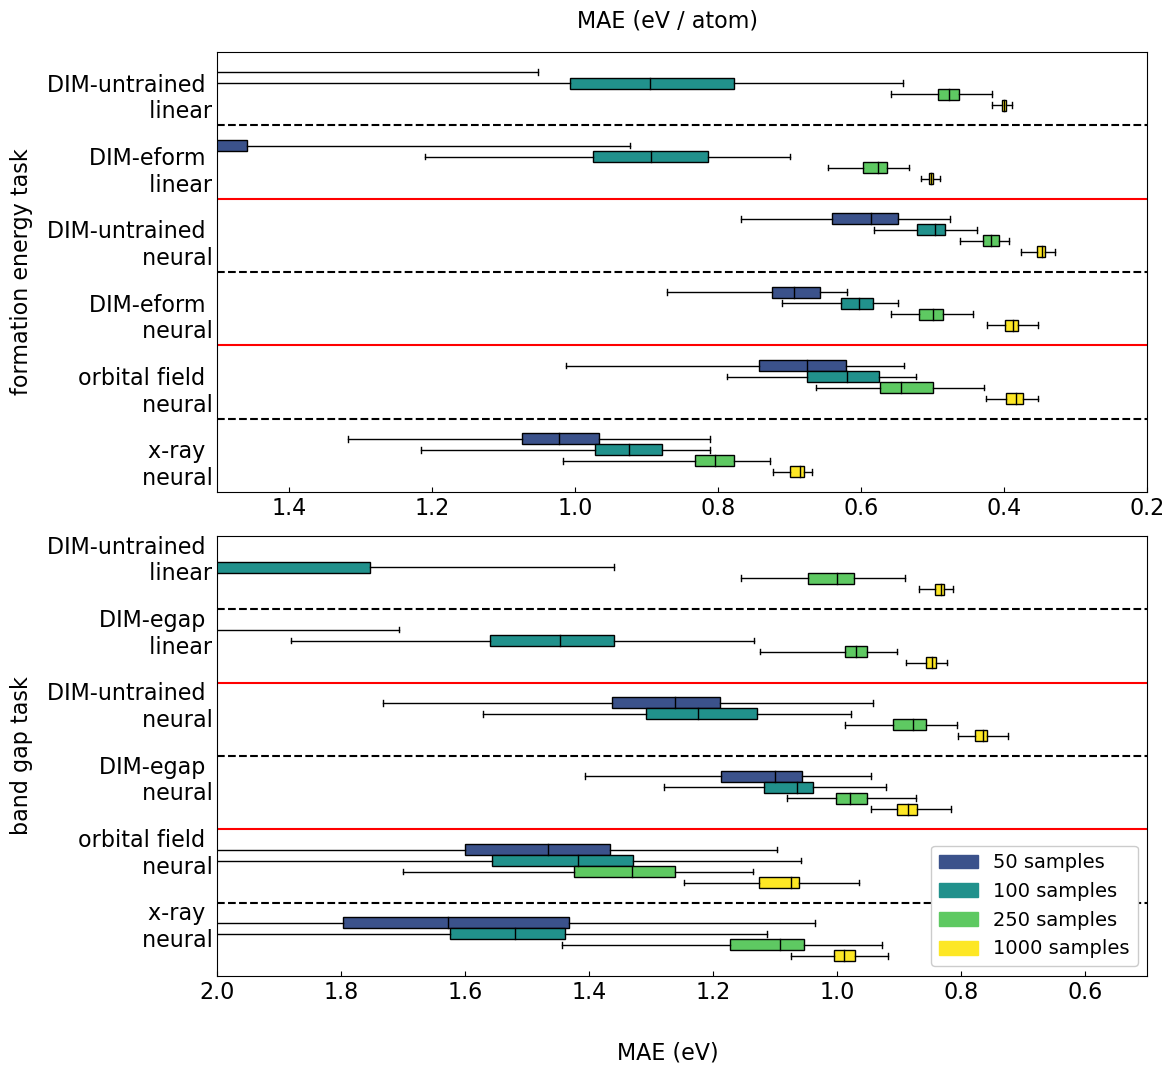

In [6]:
#Produces SI figure A.1

import pandas as pd
import matplotlib.pyplot as plt      
import matplotlib.colors as colors
import matplotlib.ticker as ticker
import matplotlib
import numpy as np

plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"

font = {'size'   : 16}

matplotlib.rc('font', **font)

RepMAE = pd.read_csv("Downstream_DIM.csv")
eformorbitalMAE = pd.read_csv("featurizer_pickles/eformorbital_Downstream_Featurized.csv")
eformjarvisMAE = pd.read_csv("featurizer_pickles copy/eformjarvis_Downstream_Featurized.csv")
eformxrayMAE =  pd.read_csv("featurizer_pickles/eformxray_Downstream_Featurized.csv")

fig,ax = plt.subplots(2, 1, sharex=False, sharey="row",gridspec_kw={'wspace':0.1, 'hspace':0.1},figsize=(12,12))
fig.text(0.5, 0.90, "MAE (eV / atom)", ha='center')

ax_i = 0
ax[0].set_ylabel("formation energy task",labelpad=10)
offset=-0.225
for limit,name,xlim,color in zip([50,100,250,1000],["eformorbital_replearn_10.png","eformorbital_replearn_50.png","eformorbital_replearn_100.png","eformorbital_replearn_250.png","eformorbital_replearn_1000.png","eformorbital_replearn_10000.png"],[[1.5,0.4],[1,0.4],[0.9,0.3],[0.8,0.28]],color_palette):

    vectors1 = RepMAE[(RepMAE["limit"] == limit) & (RepMAE["model"] == "Initial_eform")]
    vectors2 = RepMAE[(RepMAE["limit"] == limit) & (RepMAE["model"] == "nocomp_klnorm_eform")]
    vectors3 = eformorbitalMAE[(eformorbitalMAE["limit"] == limit) & (eformorbitalMAE["model"] == "eform_orbital")]
    vectors4 = eformjarvisMAE[(eformjarvisMAE["limit"] == limit) & (eformjarvisMAE["model"] == "eform_jarvis")]
    vectors5 = eformxrayMAE[(eformxrayMAE["limit"] == limit) & (eformxrayMAE["model"] == "eform_xray")]

    if ax_i == 2:
        box_plot(ax[0],[vectors1["lin_MAE"],vectors2["lin_MAE"],vectors1["nn_MAE"],vectors2["nn_MAE"],vectors3["nn_MAE"],vectors5["nn_MAE"]],"black",color,labels=["DIM-untrained \n linear","DIM-eform \n linear","DIM-untrained \n neural","DIM-eform \n neural","orbital field \n neural","x-ray \n neural"],widths=0.15,vert=False,whis=100000000,positions=[i+1+offset for i in range(6)])
    else:
        box_plot(ax[0],[vectors1["lin_MAE"],vectors2["lin_MAE"],vectors1["nn_MAE"],vectors2["nn_MAE"],vectors3["nn_MAE"],vectors5["nn_MAE"]],"black",color,labels=["","","","","",""],widths=0.15,vert=False,whis=100000000,positions=[i+1+offset for i in range(6)])
    ax[0].set_ylim(6.5,0.5)
    ax[0].set_xlim(1.5,0.2)

    ax_i += 1
    offset+=0.15

RepMAE = pd.read_csv("Downstream_DIM.csv")
egaporbitalMAE = pd.read_csv("featurizer_pickles/egaporbital_Downstream_Featurized.csv")
egapjarvisMAE = pd.read_csv("featurizer_pickles copy/egapjarvis_Downstream_Featurized.csv")
egapxrayMAE =  pd.read_csv("featurizer_pickles/egapxray_Downstream_Featurized.csv")

fig.text(0.5, 0.04, "MAE (eV)", ha='center')

ax_i = 0
ax[1].set_ylabel("band gap task",labelpad=10)
offset=-0.225
for limit,name,xlim,color  in zip([50,100,250,1000],["egaporbital_replearn_10.png","egaporbital_replearn_50.png","egaporbital_replearn_100.png","egaporbital_replearn_250.png","egaporbital_replearn_1000.png","egaporbital_replearn_10000.png"],[[3.2,0.7],[2.5,0.8],[1.6,0.7],[1.3,0.7]],color_palette):

    vectors1 = RepMAE[(RepMAE["limit"] == limit) & (RepMAE["model"] == "Initial_egap")]
    vectors2 = RepMAE[(RepMAE["limit"] == limit) & (RepMAE["model"] == "nocomp_klnorm_egap")]
    vectors3 = egaporbitalMAE[(eformorbitalMAE["limit"] == limit) & (egaporbitalMAE["model"] == "egap_orbital")]
    vectors4 = egapjarvisMAE[(eformjarvisMAE["limit"] == limit) & (egapjarvisMAE["model"] == "egap_jarvis")]
    vectors5 = egapxrayMAE[(eformxrayMAE["limit"] == limit) & (egapxrayMAE["model"] == "egap_xray")]

    xmin = np.min(np.array([np.min(vectors1["nn_MAE"]),np.min(vectors2["nn_MAE"]),np.min(vectors3["nn_MAE"]),np.min(vectors5["nn_MAE"])]))
    xmax = np.max(np.array([np.max(vectors1["nn_MAE"]),np.max(vectors2["nn_MAE"]),np.max(vectors3["nn_MAE"]),np.max(vectors5["nn_MAE"])]))
    xbuffer = (xmax-xmin)*0.05

    if ax_i == 0:
        box_plot(ax[1],[vectors1["lin_MAE"],vectors2["lin_MAE"],vectors1["nn_MAE"],vectors2["nn_MAE"],vectors3["nn_MAE"],vectors5["nn_MAE"]],"black",color,labels=["DIM-untrained \n linear","DIM-egap \n linear","DIM-untrained \n neural","DIM-egap \n neural","orbital field \n neural","x-ray \n neural"],vert=False,whis=100000000,positions=[i+1+offset for i in range(6)],widths=0.15)
    else:
        box_plot(ax[1],[vectors1["lin_MAE"],vectors2["lin_MAE"],vectors1["nn_MAE"],vectors2["nn_MAE"],vectors3["nn_MAE"],vectors5["nn_MAE"]],"black",color,labels=["","","","","",""],vert=False,whis=100000000,positions=[i+1+offset for i in range(6)],widths=0.15)
    ax[1].set_ylim(6.5,0.5)
    ax[1].set_xlim(2,0.5)

    ax_i += 1
    offset+=0.15

[ax[0].axhline(y, color = 'r', linestyle='-') for y in [2.5,4.5]]
[ax[0].axhline(y, color = 'black', linestyle='--') for y in [1.5,3.5,5.5]]
[ax[1].axhline(y, color = 'r', linestyle='-') for y in [2.5,4.5]]
[ax[1].axhline(y, color = 'black', linestyle='--') for y in [1.5,3.5,5.5]]
ax[1].legend(handles=[Patch(color=color_palette[0],label="50 samples"),Patch(color=color_palette[1],label="100 samples"),Patch(color=color_palette[2],label="250 samples"),Patch(color=color_palette[3],label="1000 samples")], loc='lower right', fontsize="14",framealpha=1)

ax[0].tick_params(axis="y", length=0)
ax[1].tick_params(axis="y", length=0)
fig.savefig("figure_representation_control.png",bbox_inches="tight")
fig.show()



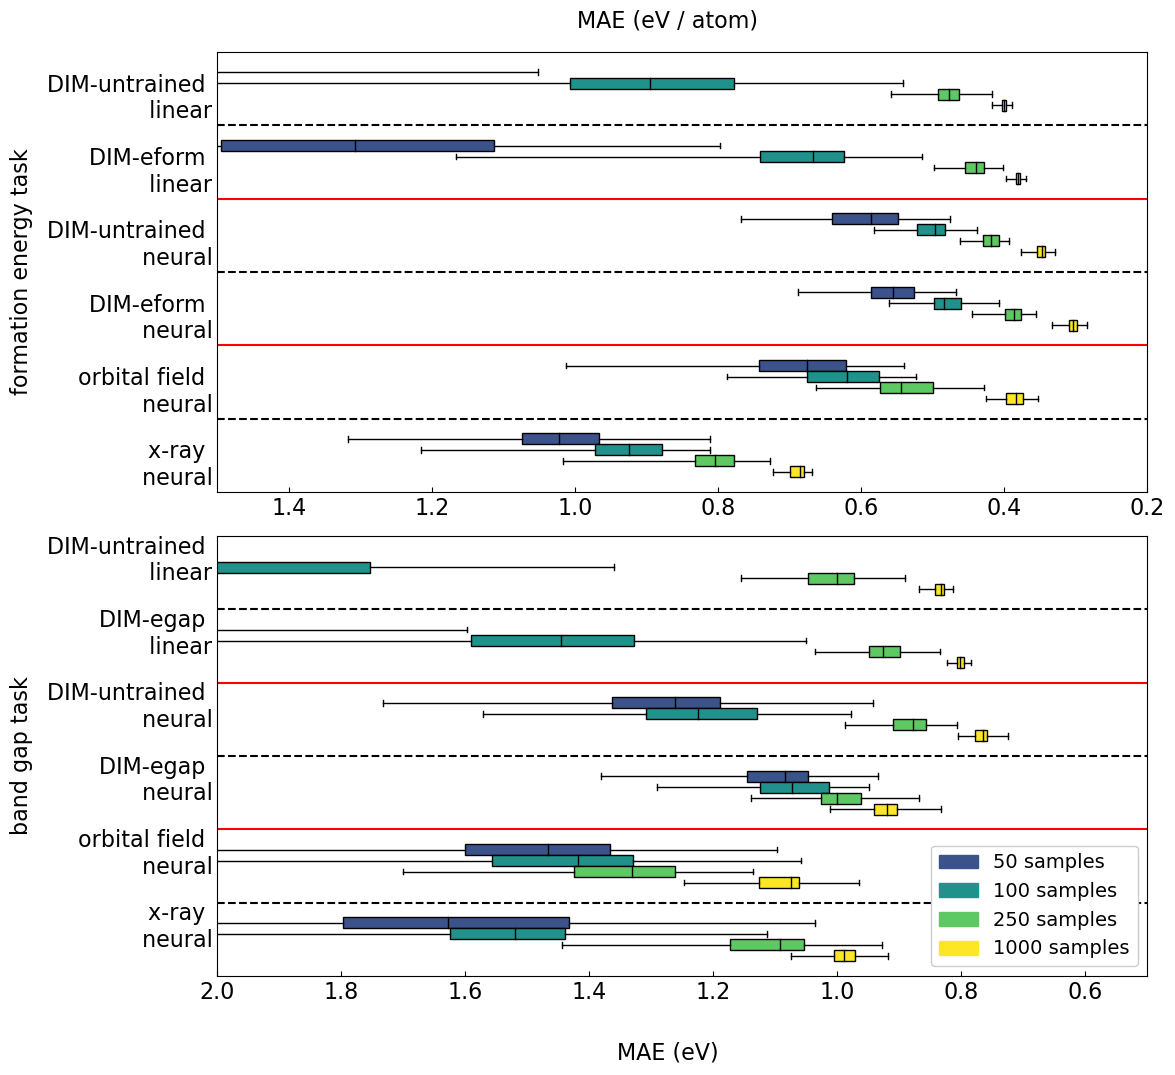

In [7]:
#Produces figure #

import pandas as pd
import matplotlib.pyplot as plt      
import matplotlib.colors as colors
import matplotlib.ticker as ticker
import matplotlib
import numpy as np

plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"

font = {'size'   : 16}

matplotlib.rc('font', **font)

RepMAE = pd.read_csv("Downstream_DIM.csv")
eformorbitalMAE = pd.read_csv("featurizer_pickles/eformorbital_Downstream_Featurized.csv")
eformjarvisMAE = pd.read_csv("featurizer_pickles copy/eformjarvis_Downstream_Featurized.csv")
eformxrayMAE =  pd.read_csv("featurizer_pickles/eformxray_Downstream_Featurized.csv")

fig,ax = plt.subplots(2, 1, sharex=False, sharey="row",gridspec_kw={'wspace':0.1, 'hspace':0.1},figsize=(12,12))
fig.text(0.5, 0.90, "MAE (eV / atom)", ha='center')

ax_i = 0
ax[0].set_ylabel("formation energy task",labelpad=10)
offset=-0.225
for limit,name,xlim,color in zip([50,100,250,1000],["eformorbital_replearn_10.png","eformorbital_replearn_50.png","eformorbital_replearn_100.png","eformorbital_replearn_250.png","eformorbital_replearn_1000.png","eformorbital_replearn_10000.png"],[[1.5,0.4],[1,0.4],[0.9,0.3],[0.8,0.28]],color_palette):

    vectors1 = RepMAE[(RepMAE["limit"] == limit) & (RepMAE["model"] == "Initial_eform")]
    vectors2 = RepMAE[(RepMAE["limit"] == limit) & (RepMAE["model"] == "nocomp_klnorm_moremultiloss_eform")]
    vectors3 = eformorbitalMAE[(eformorbitalMAE["limit"] == limit) & (eformorbitalMAE["model"] == "eform_orbital")]
    vectors4 = eformjarvisMAE[(eformjarvisMAE["limit"] == limit) & (eformjarvisMAE["model"] == "eform_jarvis")]
    vectors5 = eformxrayMAE[(eformxrayMAE["limit"] == limit) & (eformxrayMAE["model"] == "eform_xray")]

    if ax_i == 2:
        box_plot(ax[0],[vectors1["lin_MAE"],vectors2["lin_MAE"],vectors1["nn_MAE"],vectors2["nn_MAE"],vectors3["nn_MAE"],vectors5["nn_MAE"]],"black",color,labels=["DIM-untrained \n linear","DIM-eform \n linear","DIM-untrained \n neural","DIM-eform \n neural","orbital field \n neural","x-ray \n neural"],widths=0.15,vert=False,whis=100000000,positions=[i+1+offset for i in range(6)])
    else:
        box_plot(ax[0],[vectors1["lin_MAE"],vectors2["lin_MAE"],vectors1["nn_MAE"],vectors2["nn_MAE"],vectors3["nn_MAE"],vectors5["nn_MAE"]],"black",color,labels=["","","","","",""],widths=0.15,vert=False,whis=100000000,positions=[i+1+offset for i in range(6)])
    ax[0].set_ylim(6.5,0.5)
    ax[0].set_xlim(1.5,0.2)

    ax_i += 1
    offset+=0.15

RepMAE = pd.read_csv("Downstream_DIM.csv")
egaporbitalMAE = pd.read_csv("featurizer_pickles/egaporbital_Downstream_Featurized.csv")
egapjarvisMAE = pd.read_csv("featurizer_pickles copy/egapjarvis_Downstream_Featurized.csv")
egapxrayMAE =  pd.read_csv("featurizer_pickles/egapxray_Downstream_Featurized.csv")

fig.text(0.5, 0.04, "MAE (eV)", ha='center')

ax_i = 0
ax[1].set_ylabel("band gap task",labelpad=10)
offset=-0.225
for limit,name,xlim,color  in zip([50,100,250,1000],["egaporbital_replearn_10.png","egaporbital_replearn_50.png","egaporbital_replearn_100.png","egaporbital_replearn_250.png","egaporbital_replearn_1000.png","egaporbital_replearn_10000.png"],[[3.2,0.7],[2.5,0.8],[1.6,0.7],[1.3,0.7]],color_palette):

    vectors1 = RepMAE[(RepMAE["limit"] == limit) & (RepMAE["model"] == "Initial_egap")]
    vectors2 = RepMAE[(RepMAE["limit"] == limit) & (RepMAE["model"] == "nocomp_klnorm_moremultiloss_egap")]
    vectors3 = egaporbitalMAE[(eformorbitalMAE["limit"] == limit) & (egaporbitalMAE["model"] == "egap_orbital")]
    vectors4 = egapjarvisMAE[(eformjarvisMAE["limit"] == limit) & (egapjarvisMAE["model"] == "egap_jarvis")]
    vectors5 = egapxrayMAE[(eformxrayMAE["limit"] == limit) & (egapxrayMAE["model"] == "egap_xray")]

    xmin = np.min(np.array([np.min(vectors1["nn_MAE"]),np.min(vectors2["nn_MAE"]),np.min(vectors3["nn_MAE"]),np.min(vectors5["nn_MAE"])]))
    xmax = np.max(np.array([np.max(vectors1["nn_MAE"]),np.max(vectors2["nn_MAE"]),np.max(vectors3["nn_MAE"]),np.max(vectors5["nn_MAE"])]))
    xbuffer = (xmax-xmin)*0.05

    if ax_i == 0:
        box_plot(ax[1],[vectors1["lin_MAE"],vectors2["lin_MAE"],vectors1["nn_MAE"],vectors2["nn_MAE"],vectors3["nn_MAE"],vectors5["nn_MAE"]],"black",color,labels=["DIM-untrained \n linear","DIM-egap \n linear","DIM-untrained \n neural","DIM-egap \n neural","orbital field \n neural","x-ray \n neural"],vert=False,whis=100000000,positions=[i+1+offset for i in range(6)],widths=0.15)
    else:
        box_plot(ax[1],[vectors1["lin_MAE"],vectors2["lin_MAE"],vectors1["nn_MAE"],vectors2["nn_MAE"],vectors3["nn_MAE"],vectors5["nn_MAE"]],"black",color,labels=["","","","","",""],vert=False,whis=100000000,positions=[i+1+offset for i in range(6)],widths=0.15)
    ax[1].set_ylim(6.5,0.5)
    ax[1].set_xlim(2,0.5)

    ax_i += 1
    offset+=0.15

[ax[0].axhline(y, color = 'r', linestyle='-') for y in [2.5,4.5]]
[ax[0].axhline(y, color = 'black', linestyle='--') for y in [1.5,3.5,5.5]]
[ax[1].axhline(y, color = 'r', linestyle='-') for y in [2.5,4.5]]
[ax[1].axhline(y, color = 'black', linestyle='--') for y in [1.5,3.5,5.5]]
ax[1].legend(handles=[Patch(color=color_palette[0],label="50 samples"),Patch(color=color_palette[1],label="100 samples"),Patch(color=color_palette[2],label="250 samples"),Patch(color=color_palette[3],label="1000 samples")], loc='lower right', fontsize="14",framealpha=1)

ax[0].tick_params(axis="y", length=0)
ax[1].tick_params(axis="y", length=0)
fig.savefig("figure_representation.png",bbox_inches="tight")
fig.show()

